In [45]:
## In CNN we don't have to flatten the image, we pass the image in its form, it accepts 2d input or 3d inputs.
## Image -> 2d array of pixels
##  Convulations are used to extract the features from the image. 
## 3 by 3 convulational kernel
## During convulational a window is passed over the image of 3 by 3 size to extract features.
## After this pooling is done (COMMONLY -max pooling)
## It taked the maximumn value from the window until the window slides through whole image
## CNN is simplyfying the image
## 1st COnvulatinal layer finds basic features like edges curves
## 

import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    cat_count = 0
    dog_count = 0
    total = 0
    def make_training_data(self):
        for label in self.LABELS:
            print(self.LABELS[label])
            for image in tqdm(os.listdir(label)): ## for each image in a particular directory - first CAT then                                                     ## DOG. 
                try:
                    imagePath = os.path.join(label,image) ## PetImages/Cat/image_name||PetImages/Dog/image_name
                    img = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE) ## get the particular image into grayscale                                                                       ## format into the variable img
                    img = cv2.resize(img, (self.IMG_SIZE,self.IMG_SIZE)) ## resize the image into 50*50
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    #np.eye(2)[0]=[1,0] cats
                    #np.eye(2)[1]=[0,1] dogs
                    if(self.LABELS[label] == 0):##cats
                        self.cat_count += 1
                    elif(self.LABELS[label] == 1):##dogs
                        self.dog_count += 1

                except Exception as e:
                    pass
                    #print(label, image, str(e))
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Cats: ",self.cat_count)
        print("Dogs: ",self.dog_count)



if REBUILD_DATA:
    dogsvcats = DogsVSCats()    
    dogsvcats.make_training_data()

In [10]:
np.eye(2)[0]

array([1., 0.])

In [17]:
training_data = np.load("training_data.npy",allow_pickle=True)
print(len(training_data))

24946


In [42]:
print(training_data[1])
print(training_data[1][0])
print(training_data[1][1])

[array([[116, 119, 122, ..., 178, 178, 177],
       [117, 119, 122, ..., 179, 179, 179],
       [119, 119, 123, ..., 181, 180, 180],
       ...,
       [108, 123, 130, ..., 150, 152, 152],
       [119, 127, 133, ..., 148, 149, 149],
       [124, 130, 129, ..., 145, 146, 146]], dtype=uint8)
 array([0., 1.])]
[[116 119 122 ... 178 178 177]
 [117 119 122 ... 179 179 179]
 [119 119 123 ... 181 180 180]
 ...
 [108 123 130 ... 150 152 152]
 [119 127 133 ... 148 149 149]
 [124 130 129 ... 145 146 146]]
[0. 1.]


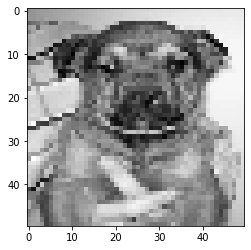

In [40]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0],cmap="gray")
plt.show()

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as 

## Now we can split our training data into X and y, as well as convert it to a tensor:
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## gray scale images will have one input channel and coloured will have 3 input channels - red, green,           ## and blue
        ## The stride argument indicates how far the filter is moved after each computation.
        self.conv1 = nn.Conv2d(1,32,5) ## Input, Output, Kernel Size = 5by5
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(,512)
        self.fc2 = nn.Linear(512,2)

    def convs(self,x):







                                                        